In this notebook we reproduce experiments from Section 4.3 in Jacob's write up. We check and analyze if connection between parents impact the entropy of the child. 3 parent connection types are considered: no connections, simplex connections and full connections (including loops).

In [1]:
# imports
%matplotlib inline
from brian2 import *
import dit
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import gen_connections
import simulation
import new_it_analyzer


First generate the experiment, each box correspond to one parent connection type.

In [33]:
#To run this script, you need to have a folder at location PATH_TO_DIR available, 
#and it must contain a 'raster' folder as well. The simulations take a while, 
#reduce N_MONTE_CARLO to make it faster bu less stable. 

PATH_TO_DIR = f'observations/mutual_information_and_common_parents/disconnected/'
N_MONTE_CARLO = 500
#disconnected_xaxis = list(range(1,20))#+list(np.arange(21,200, 5))
#disconnected_xaxis = np.arange(21, 40, 2)
#disconnected_xaxis = np.arange(40,100, 5)
disconnected_xaxis = np.arange(100,200, 10)

#Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
for nb_parents in disconnected_xaxis:
    nb_neurons=nb_parents+2
    synapse_weight=10
    
    #first child
    pre_syn=[i for i in range(2, nb_parents+2)] 
    pos_syn=[0 for x in pre_syn]
    
    #second child
    pos_syn+=[1 for x in pre_syn] 
    pre_syn+=pre_syn
    
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_2'.format(nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

disconnected_xaxis=list(range(1,20))+list(np.arange(21,40,2))+list(np.arange(40,100, 5))+list(np.arange(100,200, 10))  

In [30]:
#same but simplex connection.

PATH_TO_DIR = f'observations/mutual_information_and_common_parents/simplex/'
N_MONTE_CARLO = 500
simplex_xaxis = list(np.arange(100,200, 10))#list(np.arange(40,100, 5))#np.arange(2,21,2)#np.arange(1,40,2)

for nb_parents in simplex_xaxis:
    nb_neurons=nb_parents+2
    synapse_weight=10
    
    #parent-child connection
    pre_syn=[i for i in range(2, nb_parents+2)] + [i for i in range(2, nb_parents+2)] 
    pos_syn=[0 for x in range(2, nb_parents+2)]+ [1 for x in range(2, nb_parents+2)] 
    
    #parent-parent connection
    simplex_pre_syn, simplex_pos_syn = gen_connections.simplex(nb_parents) #for parent parent connec
    pre_syn+=[x+2 for x in simplex_pre_syn]
    pos_syn+=[x+2 for x in simplex_pos_syn]
    
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_2'.format(nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

simplex_xaxis = list(range(1,21))+list(np.arange(21,40,2))+list(np.arange(40,100, 5))+list(np.arange(100,200, 10))

In [66]:
#same but full connection

PATH_TO_DIR = f'observations/mutual_information_and_common_parents/full/'
N_MONTE_CARLO = 500
#full_xaxis = np.arange(1,40, 2)#list(range(1,30))+list(np.arange(30,100,5))
#full_xaxis = np.arange(2,21, 2)#list(range(1,30))+list(np.arange(30,100,5))
full_xaxis = list(np.arange(40,200,10))
full_xaxis = list(np.arange(2,21,2))


#Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
for nb_parents in full_xaxis:
    nb_neurons=nb_parents+2
    synapse_weight=10
    
    #parent-child
    pre_syn=[i for i in range(2, nb_parents+2)]+[i for i in range(2, nb_parents+2)] #for parent child conn
    pos_syn=[0 for x in range(2, nb_parents+2)]+[1 for x in range(2, nb_parents+2)]
    
    #parent-parent
    full_pre_syn, full_pos_syn = gen_connections.full(nb_parents) #for parent parent connec
    pre_syn+=[x+2 for x in full_pre_syn]
    pos_syn+=[x+2 for x in full_pos_syn]
    
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_2'.format(nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

    

In [32]:
#same but tori connection

PATH_TO_DIR = f'observations/mutual_information_and_common_parents/torus/'
N_MONTE_CARLO = 500
torus_xaxis=[x*x for x in np.arange(1,15,1)]

#Star shaped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
for nb_parents in range(10,15):
    nb_neurons=nb_parents*nb_parents+2
    synapse_weight=10
    
    #parent-child
    pre_syn=[i for i in range(2, nb_parents*nb_parents+2)] + [i for i in range(2, nb_parents*nb_parents+2)] #for parent child conn
    pos_syn=[0 for x in range(2, nb_parents*nb_parents+2)] + [1 for x in range(2, nb_parents*nb_parents+2)]

    #parent-parent
    tori_pre_syn, tori_pos_syn = gen_connections.torus(nb_parents, nb_parents) #for parent parent connec
    pre_syn+=[x+2 for x in tori_pre_syn]
    pos_syn+=[x+2 for x in tori_pos_syn]
    
    ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'parents_{}_child_2'.format(nb_parents*nb_parents), stim='off')
    ex.simulate(N_MONTE_CARLO, PATH_TO_DIR)
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    

    

Now we plot some information measures. See Figures 9-14 in Section 4.3.

In [2]:

def generate_children_mut_inf(connection_type, xaxis, children_connection_type=None):
    if children_connection_type is None:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'/'
    else:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'_'+children_connection_type+'/'
    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+2)) for i in xaxis]
    children_mutual_inf=[np.mean([dit.shannon.mutual_information(d, [0], [1], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return children_mutual_inf

#same but conditioned on parents
def generate_children_cond_mut_inf(connection_type, xaxis, children_connection_type=None):
    if children_connection_type is None:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'/'
    else:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'_'+children_connection_type+'/'

    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+2)) for i in xaxis]
    children_mutual_inf=[np.mean([dit.shannon.conditional_entropy(d, [0], range(2,analyz.nb_neurons), rv_mode='indices')-dit.shannon.conditional_entropy(d, [0], range(1, analyz.nb_neurons), rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return children_mutual_inf

def generate_child_entropy_siblings(connection_type, xaxis, children_connection_type=None):
    if children_connection_type is None:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'/'
    else: 
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'_'+children_connection_type+'/'

    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+2)) for i in xaxis]
    child_entropy=[np.mean([dit.shannon.entropy(d, [0], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return child_entropy






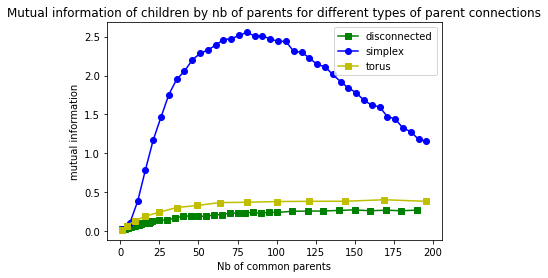

In [3]:
#This plot corresponds to Figure 9
torus_xaxis=[x*x for x in np.arange(1,15,1)]
simplex_xaxis = np.arange(1,200,5)
disconnected_xaxis = list(range(1,20))+list(range(20,100, 5))+list(np.arange(100,200, 10))


plt.title('Mutual information of children by nb of parents for different types of parent connections')

plt.plot(disconnected_xaxis, generate_children_mut_inf('disconnected', disconnected_xaxis, 'bridge'), 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis, generate_children_mut_inf('simplex', simplex_xaxis, 'bridge'), 'bo-', label = 'simplex')
plt.plot(torus_xaxis, generate_children_mut_inf('torus', torus_xaxis, 'bridge'), 'ys-', label = 'torus')



plt.ylabel('mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

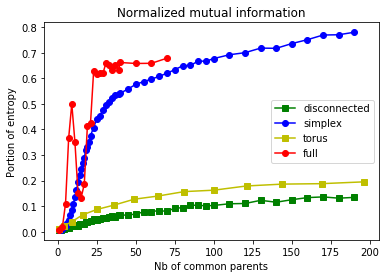

In [6]:
#This is the normalized version. Not present in report.

torus_xaxis=[x*x for x in np.arange(1,15,1)]
simplex_xaxis = list(range(1,21))+list(np.arange(21,40,2))+list(np.arange(40,100, 5))+list(np.arange(100,200, 10))
disconnected_xaxis=list(range(1,20))+list(np.arange(21,40,2))+list(np.arange(40,100, 5))+list(np.arange(100,200, 10))
full_xaxis = full_xaxis = list(np.arange(1,40, 2))+list(np.arange(40,80,10))

mutinf_full = generate_children_mut_inf('full', full_xaxis)
mutinf_disc = generate_children_mut_inf('disconnected', disconnected_xaxis)
mutinf_simplex = generate_children_mut_inf('simplex', simplex_xaxis)
mutinf_torus = generate_children_mut_inf('torus', torus_xaxis)

entrop_disc=generate_child_entropy_siblings('disconnected', disconnected_xaxis)
entrop_simplex=generate_child_entropy_siblings('simplex', simplex_xaxis)
entrop_torus=generate_child_entropy_siblings('torus', torus_xaxis)
entropy_full = generate_child_entropy_siblings('full', full_xaxis)

plt.title('Normalized mutual information')

plt.plot(disconnected_xaxis, [mutinf_disc[i]/entrop_disc[i] for i in range(len(mutinf_disc))], 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis, [mutinf_simplex[i]/entrop_simplex[i] for i in range(len(mutinf_simplex))], 'bo-', label = 'simplex')
plt.plot(torus_xaxis, [mutinf_torus[i]/entrop_torus[i] for i in range(len(mutinf_torus))], 'ys-', label = 'torus')
plt.plot(full_xaxis, [mutinf_full[i]/entropy_full[i] for i in range(len(mutinf_full))], 'ro-', label = 'full')



plt.ylabel('Portion of entropy')
plt.xlabel('Nb of common parents')

plt.legend()

The following 4 plots correspond to Figure 10. To run these, make sure that all the simplex_xaxis AND simplex_xaxis_con experiments have been simulated, and lie in the associated path_to_dir from generate_children_mut_inf above.

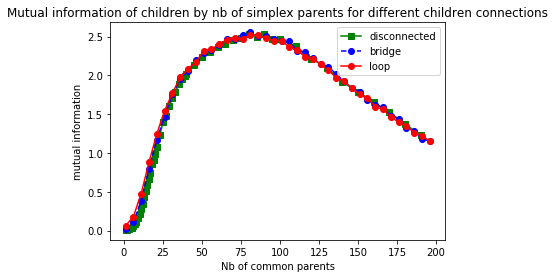

In [4]:
simplex_xaxis_con = np.arange(1,200,5)
simplex_xaxis = list(range(1,21))+list(np.arange(21,40,2))+list(np.arange(40,100, 5))+list(np.arange(100,200, 10))

plt.title('Mutual information of children by nb of simplex parents for different children connections')

plt.plot(simplex_xaxis, generate_children_mut_inf('simplex', simplex_xaxis), 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis_con, generate_children_mut_inf('simplex', simplex_xaxis_con, 'bridge'), 'bo--', label = 'bridge')
plt.plot(simplex_xaxis_con, generate_children_mut_inf('simplex', simplex_xaxis_con, 'loop'), 'ro-', label = 'loop')

plt.ylabel('mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

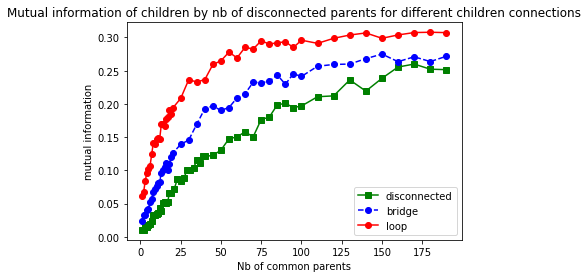

In [57]:
disconnected_xaxis_con = list(range(1,20))+list(range(20,100, 5))+list(np.arange(100,200, 10))
disconnected_xaxis=list(range(1,20))+list(np.arange(21,40,2))+list(np.arange(40,100, 5))+list(np.arange(100,200, 10))

plt.title('Mutual information of children by nb of disconnected parents for different children connections')

plt.plot(disconnected_xaxis, generate_children_mut_inf('disconnected', disconnected_xaxis), 'gs-', label = 'disconnected')
plt.plot(disconnected_xaxis_con, generate_children_mut_inf('disconnected', disconnected_xaxis_con, 'bridge'), 'bo--', label = 'bridge')
plt.plot(disconnected_xaxis_con, generate_children_mut_inf('disconnected', disconnected_xaxis_con, 'loop'), 'ro-', label = 'loop')

plt.ylabel('mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

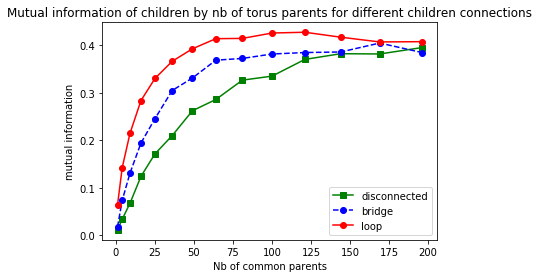

In [59]:
torus_xaxis=[x*x for x in np.arange(1,15,1)]

plt.title('Mutual information of children by nb of torus parents for different children connections')

plt.plot(torus_xaxis, generate_children_mut_inf('torus', torus_xaxis), 'gs-', label = 'disconnected')
plt.plot(torus_xaxis, generate_children_mut_inf('torus', torus_xaxis, 'bridge'), 'bo--', label = 'bridge')
plt.plot(torus_xaxis, generate_children_mut_inf('torus', torus_xaxis, 'loop'), 'ro-', label = 'loop')

plt.ylabel('mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

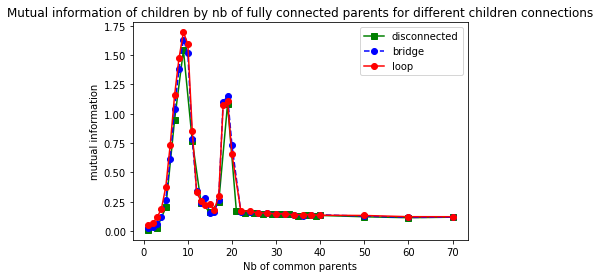

In [67]:
full_xaxis_con = list(range(1,20))+list(np.arange(20,40, 2))+list(np.arange(40,80,10))
full_xaxis = list(np.arange(1,40, 2))+list(np.arange(40,80,10))


plt.title('Mutual information of children by nb of fully connected parents for different children connections')

plt.plot(full_xaxis, generate_children_mut_inf('full', full_xaxis), 'gs-', label = 'disconnected')
plt.plot(full_xaxis_con, generate_children_mut_inf('full', full_xaxis_con, 'bridge'), 'bo--', label = 'bridge')
plt.plot(full_xaxis_con, generate_children_mut_inf('full', full_xaxis_con, 'loop'), 'ro-', label = 'loop')

plt.ylabel('mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

The following plot corresponds to Figure 11.

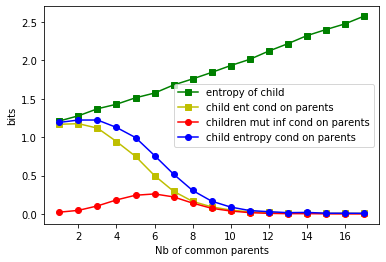

In [12]:
xaxis=range(1,20)
PATH_TO_DIR = 'observations/mutual_information_and_common_parents/simplex/'
#analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+2)) for i in xaxis]

child_entropy=[np.mean([dit.shannon.entropy(d, [0], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
child_cond_mut_inf = [np.mean([dit.shannon.conditional_entropy(d, [0], range(2,analyz.nb_neurons), rv_mode='indices')-dit.shannon.conditional_entropy(d, [0], range(1, analyz.nb_neurons), rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
con_entropy = [np.mean([dit.shannon.conditional_entropy(d, [0],range(2,analyz.nb_neurons), rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
ent_cond_every = [np.mean([dit.shannon.conditional_entropy(d, [0],range(1,analyz.nb_neurons), rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]

#children_mutual_inf=[np.mean([dit.shannon.mutual_information(d, [0], [1], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
#ent_cond_sibling = [np.mean([dit.shannon.conditional_entropy(d, [0],[1], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]


disconnected_xaxis=range(1,18)
plt.plot(disconnected_xaxis, child_entropy[:17], 'gs-', label = 'entropy of child')
plt.plot(disconnected_xaxis, ent_cond_every[:17], 'ys-', label = 'child ent cond on parents')
plt.plot(disconnected_xaxis, child_cond_mut_inf[:17], 'ro-', label = 'children mut inf cond on parents')
plt.plot(disconnected_xaxis, con_entropy[:17], 'bo-', label = 'child entropy cond on parents')
#plt.plot(disconnected_xaxis, mut_par_child_cond_par[:17], 'ys-', label = 'mutual info between parent and child cond on...')
#plt.plot(disconnected_xaxis, children_mutual_inf, 'ro-', label = 'children mutual information')


plt.ylabel('bits')
plt.xlabel('Nb of common parents')

plt.legend()

The following three plots correspond to Figure 12.

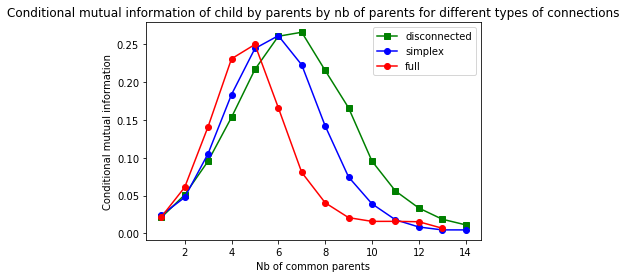

In [89]:
disconnected_xaxis=range(1,15)
simplex_xaxis=range(1,15)
full_xaxis = range(1,14)
torus_xaxis=[x*x for x in np.arange(1,5,1)]


plt.title('Conditional mutual information of child by parents by nb of parents for different types of connections')

plt.plot(disconnected_xaxis, generate_children_cond_mut_inf('disconnected', disconnected_xaxis), 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis, generate_children_cond_mut_inf('simplex', simplex_xaxis), 'bo-', label = 'simplex')
plt.plot(full_xaxis, generate_children_cond_mut_inf('full', full_xaxis), 'ro-', label = 'full')
#plt.plot(torus_xaxis, generate_children_cond_mut_inf('torus', torus_xaxis), 'ys-', label = 'torus')


plt.ylabel('Conditional mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

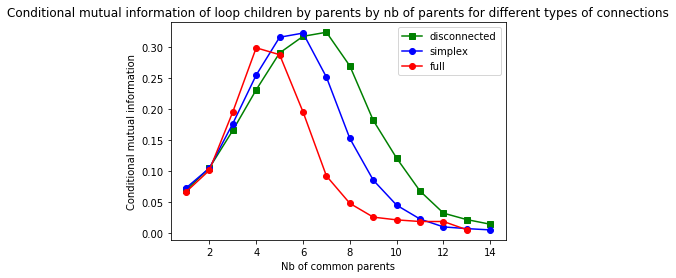

In [19]:
disconnected_xaxis=range(1,15)
simplex_xaxis=range(1,15)
full_xaxis = range(1,14)
torus_xaxis=[x*x for x in np.arange(1,5,1)]


plt.title('Conditional mutual information of loop children by parents by nb of parents for different types of connections')

plt.plot(disconnected_xaxis, generate_children_cond_mut_inf('disconnected', disconnected_xaxis, 'loop'), 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis, generate_children_cond_mut_inf('simplex', simplex_xaxis, 'loop'), 'bo-', label = 'simplex')
plt.plot(full_xaxis, generate_children_cond_mut_inf('full', full_xaxis, 'loop'), 'ro-', label = 'full')
#plt.plot(torus_xaxis, generate_children_cond_mut_inf('torus', torus_xaxis), 'ys-', label = 'torus')


plt.ylabel('Conditional mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

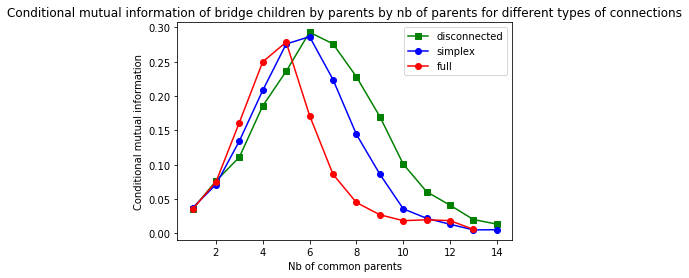

In [140]:
disconnected_xaxis=range(1,15)
simplex_xaxis=range(1,15)
full_xaxis = range(1,14)
torus_xaxis=[x*x for x in np.arange(1,5,1)]


plt.title('Conditional mutual information of bridge children by parents by nb of parents for different types of connections')

plt.plot(disconnected_xaxis, generate_children_cond_mut_inf('disconnected', disconnected_xaxis, 'bridge'), 'gs-', label = 'disconnected')
plt.plot(simplex_xaxis, generate_children_cond_mut_inf('simplex', simplex_xaxis, 'bridge'), 'bo-', label = 'simplex')
plt.plot(full_xaxis, generate_children_cond_mut_inf('full', full_xaxis, 'bridge'), 'ro-', label = 'full')
#plt.plot(torus_xaxis, generate_children_cond_mut_inf('torus', torus_xaxis), 'ys-', label = 'torus')


plt.ylabel('Conditional mutual information')
plt.xlabel('Nb of common parents')

plt.legend()

The following correspond to Figure 13.

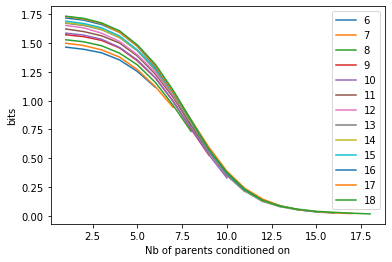

In [90]:
#Fig 13 a)
nb_par=1
for nb_par in range(6,19):
    analyz=analyzs[nb_par-1]
    cond_ent_by_nb_par =[np.mean([dit.shannon.conditional_entropy(d, [0],range(2,i), rv_mode='indices') for d in analyz.dists]) for i in range(2,nb_par+2)]
    plt.plot(range(1,nb_par+1), cond_ent_by_nb_par, label = '{}'.format(nb_par))
    plt.ylabel('bits')
    plt.xlabel('Nb of parents conditioned on')
    plt.legend()




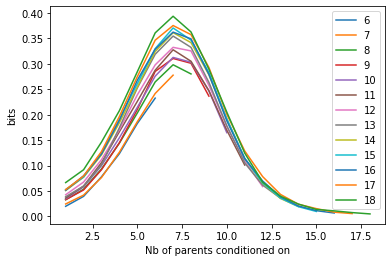

In [91]:
#Fig13 b)
nb_par=1
for nb_par in range(6,19):
    analyz=analyzs[nb_par-1]
    child_cond_mut_inf = [np.mean([dit.shannon.conditional_entropy(d, [0], range(2,i), rv_mode='indices')-dit.shannon.conditional_entropy(d, [0], range(1,i), rv_mode='indices') for d in analyz.dists]) for i in range(2, nb_par+2)]
    plt.plot(range(1,nb_par+1), child_cond_mut_inf, label = '{}'.format(nb_par))
    plt.ylabel('bits')
    plt.xlabel('Nb of parents conditioned on')
    plt.legend()




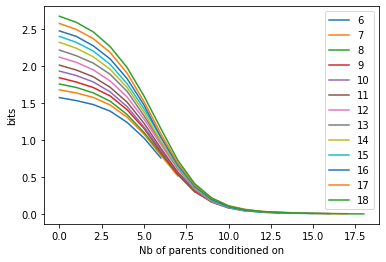

In [134]:
#Fig 13 c)
for con_type in ['simplex']:
    PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+con_type+'/'
    for nb_par in [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]: #range(6,19):
        analyz = new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(nb_par, nb_par+2))
        #child_cond_mut_inf = [np.mean([dit.shannon.conditional_entropy(d, [0], range(i,nb_par+2), rv_mode='indices')-dit.shannon.conditional_entropy(d, [0], [1]+list(range(i,nb_par+2)), rv_mode='indices') for d in analyz.dists]) for i in range(2, nb_par+2)]
        #child_cond_mut_inf = [np.mean([dit.shannon.conditional_entropy(d, [0], range(2,i), rv_mode='indices')-dit.shannon.conditional_entropy(d, [0], range(1,i), rv_mode='indices') for d in analyz.dists]) for i in range(2, nb_par+3)]

        cond_ent_by_nb_par =[np.mean([dit.shannon.conditional_entropy(d, [0],range(2,i), rv_mode='indices') for d in analyz.dists]) for i in range(2,nb_par+3)]
        plt.plot(range(nb_par+1), cond_ent_by_nb_par, label = nb_par)
        plt.ylabel('bits')
        plt.xlabel('Nb of parents conditioned on')
        plt.legend()







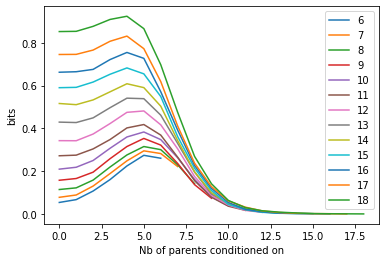

In [118]:
#Fig 13 d)
for con_type in ['simplex']:
    PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+con_type+'/'
    for nb_par in [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]: #range(6,19):
        analyz = new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(nb_par, nb_par+2))
        child_cond_mut_inf = [np.mean([dit.shannon.conditional_entropy(d, [0], range(2,i), rv_mode='indices')-dit.shannon.conditional_entropy(d, [0], range(1,i), rv_mode='indices') for d in analyz.dists]) for i in range(2, nb_par+3)]
        plt.plot(range(nb_par+1), child_cond_mut_inf, label = nb_par)
        plt.ylabel('bits')
        plt.xlabel('Nb of parents conditioned on')
        plt.legend()




